1. 基本的な画素情報タグ

画像サイズ

In [1]:
import pydicom
import matplotlib.pyplot as plt

file = pydicom.dcmread('sample/sample.dcm')

# 画像の寸法
print(f"画像サイズ: {file.Rows} x {file.Columns}")
print(f"総ピクセル数: {file.Rows * file.Columns}")
print(f"画像の面積: {file.Rows * file.Columns * (file.PixelSpacing[0] * file.PixelSpacing[1]):.2f} mm²")

画像サイズ: 3000 x 3000
総ピクセル数: 9000000
画像の面積: 184041.00 mm²


ビット深度とピクセル表現

In [2]:
# ビット深度
print(f"ビット割り当て: {file.BitsAllocated} bit")
print(f"実際のビット: {file.BitsStored} bit")
print(f"最上位ビット: {file.HighBit}")

# ピクセル表現
print(f"ピクセル表現: {file.PixelRepresentation}")
# 0 = Unsigned（符号なし）
# 1 = Signed（符号あり）

# サンプル数
print(f"ピクセルあたりのサンプル数: {file.SamplesPerPixel}")
# 1 = グレースケール
# 3 = RGB
# 4 = RGBA

ビット割り当て: 16 bit
実際のビット: 12 bit
最上位ビット: 11
ピクセル表現: 0
ピクセルあたりのサンプル数: 1


2. ピクセル間隔と物理的な寸法

In [4]:
# ピクセル間隔（mm）
print(f"ピクセル間隔: {file.PixelSpacing} mm")
print(f"X方向間隔: {file.PixelSpacing[0]} mm")
print(f"Y方向間隔: {file.PixelSpacing[1]} mm")

# 物理的な画像サイズ
physical_width = file.Columns * file.PixelSpacing[0]
physical_height = file.Rows * file.PixelSpacing[1]
print(f"物理的幅: {physical_width:.2f} mm")
print(f"物理的高さ: {physical_height:.2f} mm")

# 画像の向き
print(f"患者の向き: {file.PatientOrientation}")
# print(f"画像の向き: {file.ImageOrientationPatient}")

ピクセル間隔: [0.143, 0.143] mm
X方向間隔: 0.143 mm
Y方向間隔: 0.143 mm
物理的幅: 429.00 mm
物理的高さ: 429.00 mm
患者の向き: 


3. 画像データの取得と処理

基本的な画像データ取得

In [5]:
# ピクセルデータを取得
img = file.pixel_array
print(f"画像データの型: {img.dtype}")
print(f"画像データの形状: {img.shape}")
print(f"データの範囲: {img.min()} ~ {img.max()}")

画像データの型: uint16
画像データの形状: (3000, 3000)
データの範囲: 104 ~ 4081


画像の正規化と表示

C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pond1\AppData\Local\Temp\ipykernel_96212\4016305986.py:43: UserWarning: Glyph 35215 (\N{CJK UN

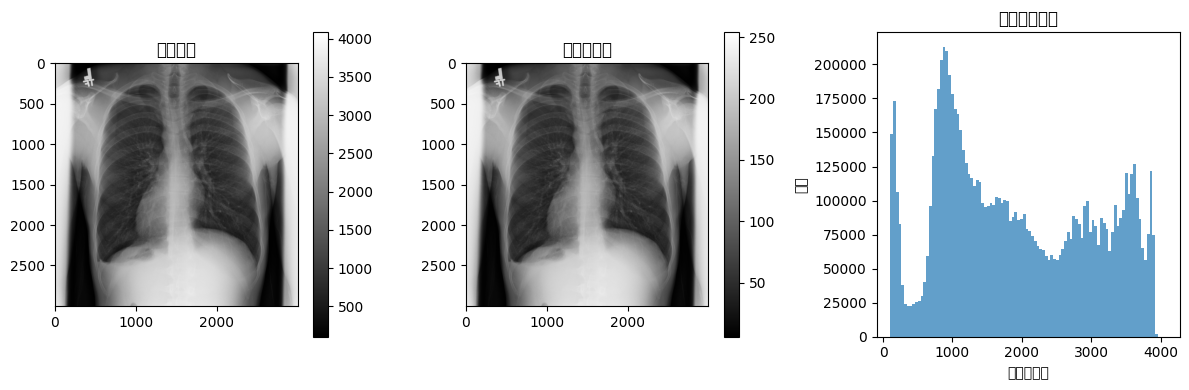

In [6]:
import numpy as np

def normalize_image(img, window_center=None, window_width=None):
    """画像を正規化して表示用に調整"""
    
    if window_center is None:
        window_center = file.WindowCenter
    if window_width is None:
        window_width = file.WindowWidth
    
    # ウィンドウレベル調整
    min_val = window_center - window_width // 2
    max_val = window_center + window_width // 2
    
    # 画像をクリッピング
    img_normalized = np.clip(img, min_val, max_val)
    
    # 0-255の範囲に正規化
    img_normalized = ((img_normalized - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    
    return img_normalized

# 正規化された画像を表示
img_normalized = normalize_image(img)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('元の画像')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(img_normalized, cmap='gray')
plt.title('正規化済み')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.hist(img.flatten(), bins=100, alpha=0.7)
plt.title('ヒストグラム')
plt.xlabel('ピクセル値')
plt.ylabel('頻度')

plt.tight_layout()
plt.show()

4. フォトメトリック解釈

In [7]:
# 画像の色解釈
print(f"フォトメトリック解釈: {file.PhotometricInterpretation}")

# 主な値の意味
photometric_interpretations = {
    'MONOCHROME2': 'グレースケール（黒=0, 白=最大値）',
    'MONOCHROME1': 'グレースケール（白=0, 黒=最大値）',
    'RGB': 'RGBカラー',
    'PALETTE COLOR': 'パレットカラー',
    'YBR_FULL': 'YBRカラー空間'
}

print(f"解釈の意味: {photometric_interpretations.get(file.PhotometricInterpretation, '不明')}")

フォトメトリック解釈: MONOCHROME2
解釈の意味: グレースケール（黒=0, 白=最大値）


5. ウィンドウレベル調整

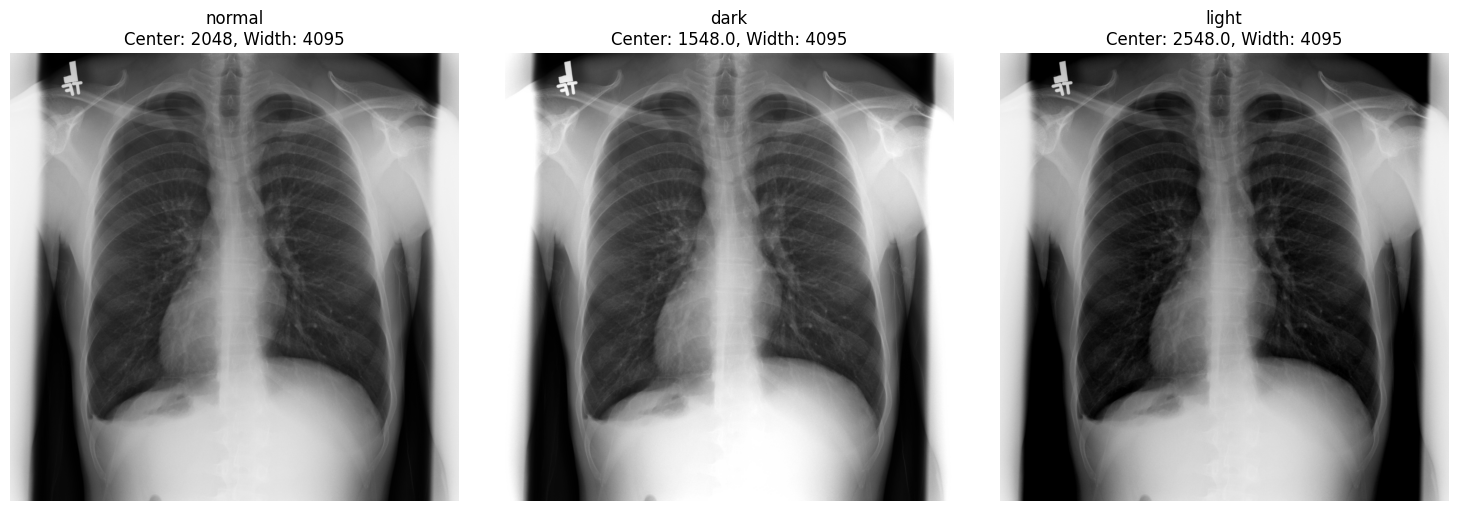

In [14]:
def apply_window_level(img, window_center, window_width):
    """ウィンドウレベル調整を適用"""
    
    # ウィンドウレベルの計算
    #window_center = 2048, window_width = 4096ときはmin_val = 0, max_val = 4096
    #window_center = 1548, window_width = 4096ときはmin_val = -1548, max_val = 1548
    #window_center = 2548, window_width = 4096ときはmin_val = 548, max_val = 3548
    min_val = window_center - window_width // 2
    max_val = window_center + window_width // 2
    
    # 画像をクリッピング
    # 画像の最小値がmin_valより小さい場合はmin_valに、最大値がmax_valより大きい場合はmax_valにクリップされる
    # min_val = -1548
    img_windowed = np.clip(img, min_val, max_val)
    
    # 0-255に正規化
    # 正規化はmin_valとmax_valの範囲を0-255の範囲に変換する
    # img_windowedは各ピクセルの諧調値である。
    #img_windowedは0-4096の範囲の値を持ち、例えば1024の場合は1024-0/4096-0*255=63.75、2048の場合は2048-0/4096-0*255=127.5、4096の場合は4096-0/4096-0*255=255となり、0-255の範囲に正規化される
    img_windowed = ((img_windowed - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    return img_windowed

# 異なるウィンドウレベルで表示
 #window_center = 2048, window_width = 4096ときは
 # window_center - 500 = 1548
 # window_center + 500 = 2548
window_settings = [
    (file.WindowCenter, file.WindowWidth, "normal"),
    (file.WindowCenter - 500, file.WindowWidth, "dark"),
    (file.WindowCenter + 500, file.WindowWidth, "light")
]

plt.figure(figsize=(15, 5))
for i, (wc, ww, title) in enumerate(window_settings):
    img_processed = apply_window_level(img, wc, ww)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_processed, cmap='gray')
    plt.title(f'{title}\nCenter: {wc}, Width: {ww}')
    plt.axis('off')

plt.tight_layout()
plt.show()

6. 画像の統計情報

=== statistics ===
min: 104
max: 4081
mean: 1920.84
median: 1732.00
std: 1090.75
var: 1189740.74
1 percentile: 135.00
5 percentile: 235.00
25 percentile: 986.00
50 percentile: 1732.00
75 percentile: 2916.00
95 percentile: 3697.00
99 percentile: 3879.00


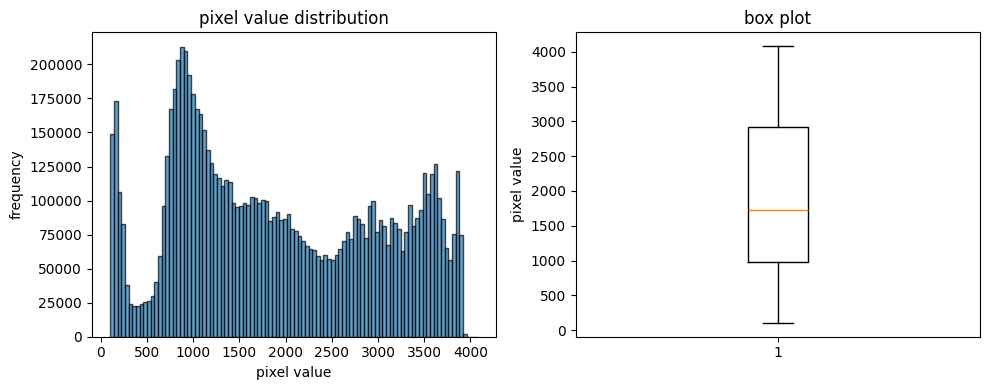

In [ ]:
def analyze_image_statistics(img):
    """画像の統計情報を分析"""
    
    print("=== statistics ===")
    print(f"min: {img.min()}")
    print(f"max: {img.max()}")
    print(f"mean: {img.mean():.2f}")
    print(f"median: {np.median(img):.2f}")
    print(f"std: {img.std():.2f}")
    print(f"var: {img.var():.2f}")
    
    # パーセンタイル
    percentiles = [1, 5, 25, 50, 75, 95, 99]
    for p in percentiles:
        value = np.percentile(img, p)
        print(f"{p} percentile: {value:.2f}")
    
    # ヒストグラム
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(img.flatten(), bins=100, alpha=0.7, edgecolor='black')
    plt.title('pixel value distribution')#ピクセル値の分布
    plt.xlabel('pixel value')#ピクセル値
    plt.ylabel('frequency')#頻度
    
    plt.subplot(1, 2, 2)
    plt.boxplot(img.flatten())
    plt.title('box plot')#ボックスプロット
    plt.ylabel('pixel value')#ピクセル値
    
    plt.tight_layout()
    plt.show()

# 統計情報を分析
analyze_image_statistics(img)

7. 実用的な画像処理例

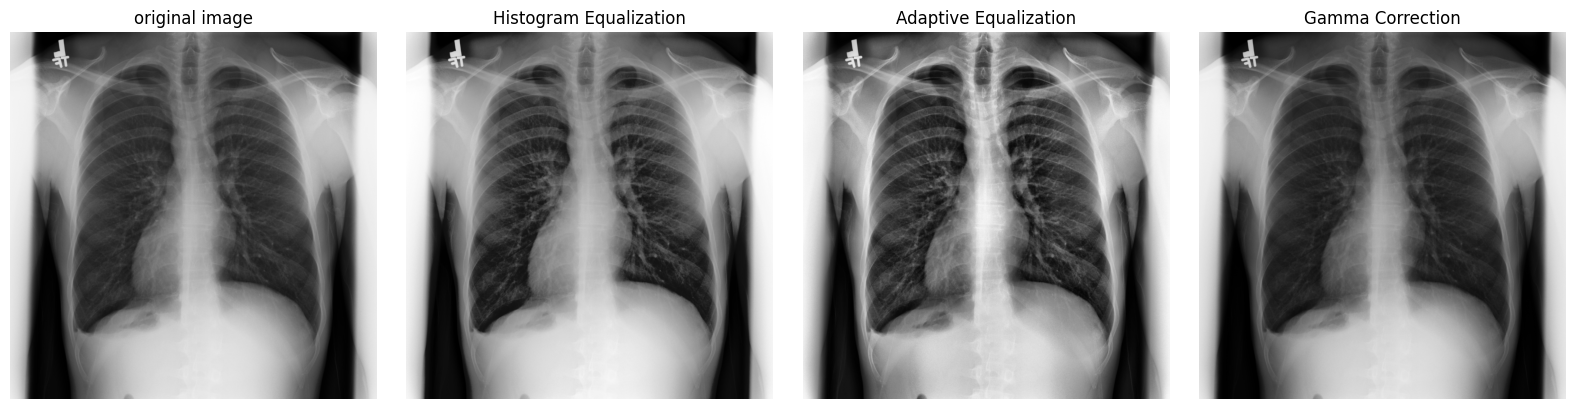

In [16]:
def enhance_dicom_image(img, method='histogram_equalization'):
    """DICOM画像のエンハンスメント"""
    
    if method == 'histogram_equalization':
        # ヒストグラム平坦化
        # ヒストグラム平坦化は、画像のヒストグラムを平坦化することで、画像のコントラストを強調する手法である。
        #　ヒストグラムとは、画像のピクセル値の分布を表すグラフである。
        from skimage import exposure
        img_enhanced = exposure.equalize_hist(img)
        return img_enhanced
    
    elif method == 'adaptive_equalization':
        # 適応的ヒストグラム平坦化
        # 適応的ヒストグラム平坦化は、画像のヒストグラムを平坦化することで、画像のコントラストを強調する手法である。
        # ヒストグラム平坦化とは違いは、画像の一部の領域に対してのみヒストグラム平坦化を行うことである。
        from skimage import exposure
        img_enhanced = exposure.equalize_adapthist(img)
        return img_enhanced
    
    elif method == 'gamma_correction':
        # ガンマ補正
        # ガンマ補正は、画像のコントラストを強調する手法である。
        # ガンマ補正は、画像のピクセル値をガンマ値で補正することで、画像のコントラストを強調する手法である。
        # ガンマ値は、画像のコントラストを強調するための値である。
        # ガンマ値が1より大きい場合は、画像のコントラストが強調される。
        # ガンマ値が1より小さい場合は、画像のコントラストが弱まる。
        gamma = 1.2
        img_enhanced = np.power(img / img.max(), gamma) * img.max()
        return img_enhanced
    
    else:
        return img

# エンハンスメントの比較
methods = ['original', 'histogram_equalization', 'adaptive_equalization', 'gamma_correction']

plt.figure(figsize=(16, 4))
for i, method in enumerate(methods):
    plt.subplot(1, 4, i + 1)
    
    if method == 'original':
        img_display = img
        title = 'original image'
    else:
        img_display = enhance_dicom_image(img, method)
        title = method.replace('_', ' ').title()
    
    plt.imshow(img_display, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()